<a href="https://colab.research.google.com/github/ram30098singh/Robot_Health_MarutiSuzuki/blob/main/Robot_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Auto Encoder and Clustering

In [1]:
import numpy as np
from scipy.fft import fft
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
pathToFolder = "/gdrive/My Drive/RAC_Maruti"

In [5]:
path = Path(pathToFolder) / "formatted_data.csv"

In [6]:
formatted_data = pd.read_csv(path)
formatted_data.head()

<ipython-input-6-267b3f56332a>:1: DtypeWarning: Columns (17,19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  formatted_data = pd.read_csv(path)


,SNo,Current J1,Position J1,Current J2,Position J2,Current J3,Position J3,Current J4,Position J4,Current J5,...,Program Register,Program Name,Program Line Number,Robot Fault Output,Alarm,Battery Low Level Output,Date,TimeStamp,Quality,record_timestamp
0,1,-1.18,53.00,1.32,-22.00,-0.08,0.01,0.05,-0.01,0.12,...,41,O0911,NaN,NaN,NaN,NaN,2023-06-23,07-09-30.744000,NaN,1.687504e+09
1,3,-1.88,52.95,-0.49,-22.02,-3.20,0.20,0.01,-0.30,1.84,...,41,O0911,NaN,NaN,NaN,NaN,2023-06-23,07-09-30.794000,NaN,1.687504e+09
2,2,-1.88,52.95,-0.49,-22.02,-3.20,0.20,0.01,-0.30,1.84,...,41,O0911,NaN,NaN,NaN,NaN,2023-06-23,07-09-30.794000,NaN,1.687504e+09
3,4,-4.78,52.74,-5.34,-22.11,3.05,1.13,-5.05,-1.77,6.95,...,41,O0911,NaN,NaN,NaN,NaN,2023-06-23,07-09-30.857000,NaN,1.687504e+09
4,5,-9.12,52.02,-5.07,-22.35,3.90,2.95,-10.19,-4.77,12.25,...,41,O0911,NaN,NaN,NaN,NaN,2023-06-23,07-09-30.920000,NaN,1.687504e+09


In [14]:
data = formatted_data

In [17]:
# Select the "Current J1" column for analysis
current_j1 = data['Current J1']

In [19]:
# Normalize the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
current_j1_normalized = scaler.fit_transform(current_j1.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test = train_test_split(current_j1_normalized, test_size=0.2, random_state=42)

In [21]:
# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 16  # You can adjust this value based on your needs

input_layer = keras.layers.Input(shape=(input_dim,))
encoder = keras.layers.Dense(encoding_dim, activation="relu")(input_layer)
decoder = keras.layers.Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = keras.models.Model(inputs=input_layer, outputs=decoder)

In [22]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
epochs = 50  # You can adjust the number of epochs
batch_size = 256
history = autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
12373/12373 [==============================] - 29s 2ms/step - loss: 3.9975e-04 - val_loss: 2.4727e-05
Epoch 2/50
12373/12373 [==============================] - 30s 2ms/step - loss: 2.4818e-05 - val_loss: 2.4765e-05
Epoch 3/50
12373/12373 [==============================] - 31s 2ms/step - loss: 2.4757e-05 - val_loss: 2.4469e-05
Epoch 4/50
12373/12373 [==============================] - 27s 2ms/step - loss: 2.4760e-05 - val_loss: 2.5122e-05
Epoch 5/50
12373/12373 [==============================] - 26s 2ms/step - loss: 2.4743e-05 - val_loss: 2.4491e-05
Epoch 6/50
12373/12373 [==============================] - 26s 2ms/step - loss: 2.4734e-05 - val_loss: 2.4564e-05
Epoch 7/50
12373/12373 [==============================] - 26s 2ms/step - loss: 2.4753e-05 - val_loss: 2.4403e-05
Epoch 8/50
12373/12373 [==============================] - 28s 2ms/step - loss: 2.4740e-05 - val_loss: 2.4427e-05
Epoch 9/50
12373/12373 [==============================] - 30s 2ms/step - loss: 2.4740e-05 - val_

### Accuracy Graph:
This shows how the Mean Absolute Error (MAE) changes over epochs during training. This will help to understand how well the model is converging.

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

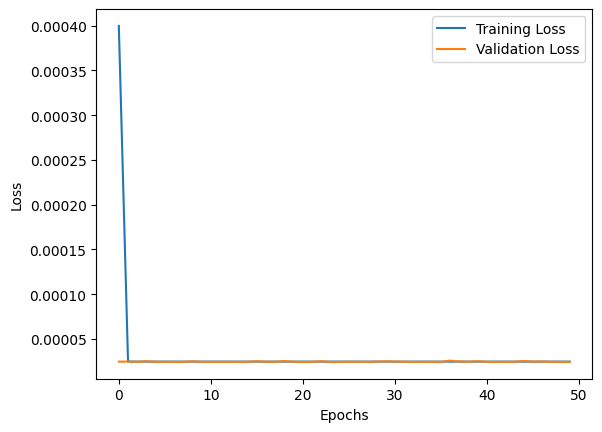

In [23]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
# Evaluate the model
encoded_data = keras.models.Model(inputs=input_layer, outputs=encoder).predict(X_test)
decoded_data = autoencoder.predict(X_test)

# Inverse transform the decoded data to the original scale
decoded_data = scaler.inverse_transform(decoded_data)


24746/24746 [==============================] - 34s 1ms/step


In [26]:
# Calculate the Mean Absolute Error (MAE) as a measure of accuracy
mae = np.mean(np.abs(X_test - decoded_data))

print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 2.4714646945911247


## Prediction vs. Ground Truth Scatter Plot:

A "Prediction vs. Ground Truth Scatter Plot" in the context of the dataset means plotting the original "Current J1" data against the reconstructed (decoded) "Current J1" data produced by the autoencoder. This plot helps to visualize how well the autoencoder is able to reproduce the values of "Current J1" and whether there's a strong correlation between the original and decoded values.



<ipython-input-41-ed7489ccd501>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('coolwarm')


Text(0.5, 0, 'Original "Current J1" Data')

Text(0, 0.5, 'Decoded "Current J1" Data')

Text(0.5, 1.0, 'Prediction vs. Ground Truth Scatter Plot')

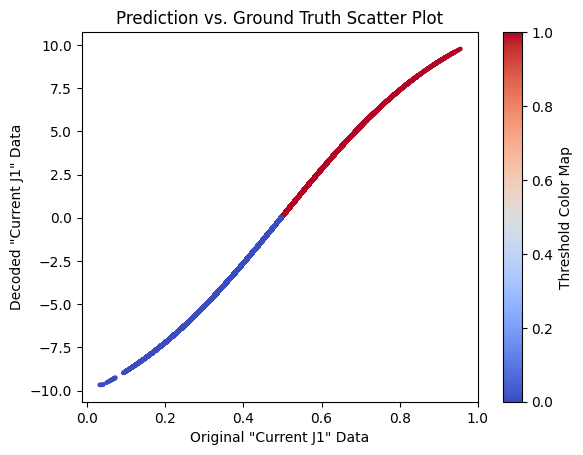

In [41]:
import matplotlib.cm as cm

# Define a threshold value (replace this with your actual threshold)
threshold = 0.5

# Create an array of values (e.g., 0 for 'red' and 1 for 'blue') based on the threshold condition
colors = np.where(X_test > threshold, 1, 0)

# Map the values to colors using a colormap (e.g., red for 0, blue for 1)
colormap = cm.get_cmap('coolwarm')

# Plot the scatter plot with specified colors
plt.scatter(X_test, decoded_data, c=colors, cmap=colormap, s=5)
plt.xlabel('Original "Current J1" Data')
plt.ylabel('Decoded "Current J1" Data')
plt.title('Prediction vs. Ground Truth Scatter Plot')
plt.colorbar(label='Threshold Color Map')
plt.show()


Each point on the scatter plot represents a data point from the dataset. If the autoencoder does a good job of reconstructing the data, we would expect to see a strong correlation where most points lie close to a diagonal line (the identity line). In other words, the closer the points are to this line, the better the autoencoder is at reproducing the original data.

If the scatter plot shows a clear and strong linear relationship between the original and decoded data, it indicates that the autoencoder has successfully captured the underlying patterns in the "Current J1" data.

### Histograms:
 Plot histograms of the original "Current J1" data and the reconstructed data to compare their distributions. This can help to understand how well the autoencoder captures the underlying patterns.

(array([8.0000e+00, 2.1000e+01, 9.0000e+00, 1.0400e+02, 2.1200e+02,
        6.9300e+02, 8.0900e+02, 1.5450e+03, 3.6260e+03, 6.8920e+03,
        1.3936e+04, 1.4534e+04, 1.4074e+04, 2.8647e+04, 2.7783e+04,
        2.2675e+04, 1.4258e+04, 1.4484e+04, 2.4905e+04, 4.3919e+04,
        5.2689e+04, 5.9944e+04, 5.5827e+04, 6.4928e+04, 8.3057e+04,
        8.3135e+04, 4.6995e+04, 2.9654e+04, 2.4116e+04, 2.0666e+04,
        8.1950e+03, 6.1530e+03, 4.3300e+03, 4.4210e+03, 3.7530e+03,
        2.9850e+03, 2.8320e+03, 1.2590e+03, 6.8700e+02, 3.7200e+02,
        7.9600e+02, 4.6600e+02, 4.6400e+02, 4.6600e+02, 1.1200e+02,
        7.8000e+01, 1.1200e+02, 1.4900e+02, 6.8000e+01, 1.8000e+01]),
 array([0.03172147, 0.05019729, 0.06867311, 0.08714894, 0.10562476,
        0.12410058, 0.1425764 , 0.16105222, 0.17952805, 0.19800387,
        0.21647969, 0.23495551, 0.25343133, 0.27190716, 0.29038298,
        0.3088588 , 0.32733462, 0.34581044, 0.36428627, 0.38276209,
        0.40123791, 0.41971373, 0.43818956, 0.

(array([3.2000e+01, 3.6000e+01, 2.9200e+02, 8.8400e+02, 1.2380e+03,
        3.3260e+03, 7.2160e+03, 1.3417e+04, 1.5029e+04, 1.3266e+04,
        2.5204e+04, 2.6714e+04, 2.1311e+04, 1.5895e+04, 1.0812e+04,
        1.3481e+04, 2.1826e+04, 3.3974e+04, 4.2362e+04, 4.3671e+04,
        4.6267e+04, 4.2639e+04, 4.7467e+04, 5.9561e+04, 7.2257e+04,
        5.6166e+04, 3.7698e+04, 2.4587e+04, 2.0457e+04, 1.8510e+04,
        1.7224e+04, 7.5290e+03, 5.0180e+03, 4.6260e+03, 3.2960e+03,
        3.8570e+03, 3.3030e+03, 2.7890e+03, 2.6540e+03, 1.7590e+03,
        8.5500e+02, 4.2400e+02, 6.8300e+02, 6.9300e+02, 4.9500e+02,
        5.5200e+02, 1.1700e+02, 1.4000e+02, 1.9600e+02, 5.6000e+01]),
 array([-9.67600536, -9.28702259, -8.89804077, -8.509058  , -8.12007618,
        -7.73109388, -7.34211159, -6.95312929, -6.564147  , -6.1751647 ,
        -5.7861824 , -5.39720011, -5.00821781, -4.61923504, -4.23025274,
        -3.84127069, -3.45228839, -3.06330609, -2.6743238 , -2.28534126,
        -1.89635909, -1.50

Text(0.5, 0, 'Current J1 Value')

Text(0, 0.5, 'Frequency')

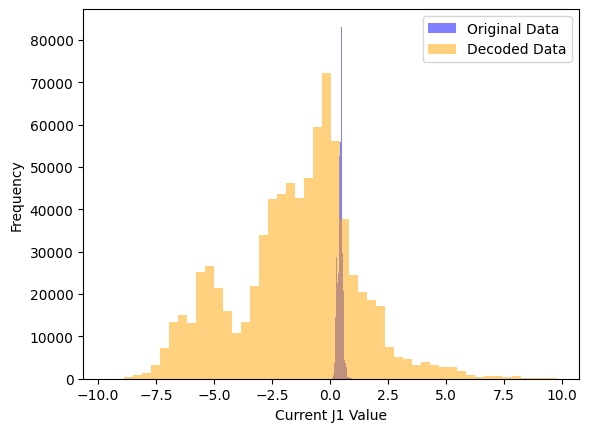

In [28]:
plt.hist(X_test, bins=50, alpha=0.5, label='Original Data', color='blue')
plt.hist(decoded_data, bins=50, alpha=0.5, label='Decoded Data', color='orange')
plt.xlabel('Current J1 Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Cluster Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'Encoded Dimension 1')

Text(0, 0.5, 'Encoded Dimension 2')

Text(0.5, 1.0, 'K-Means Clustering of Encoded Data')

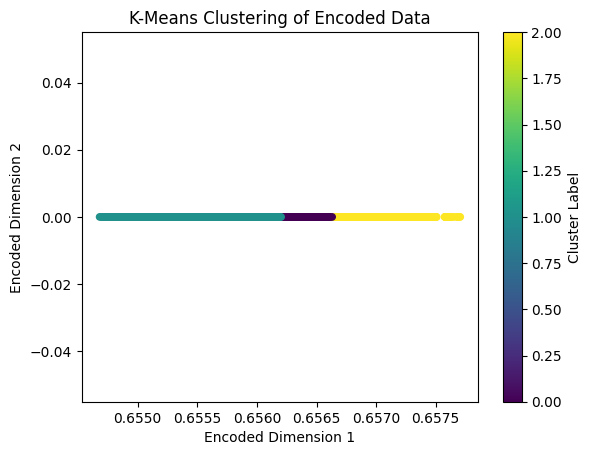

In [49]:
from sklearn.cluster import KMeans

# Assuming you have already encoded your data into encoded_data

# Define the number of clusters (you can adjust this based on your analysis)
num_clusters = 3

# Perform K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(encoded_data)

# Visualize the clusters (assuming 2D encoding)
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=cluster_labels, cmap='viridis', s=20)
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.title('K-Means Clustering of Encoded Data')
plt.colorbar(label='Cluster Label')
plt.show()


Text(0.5, 0, 'Encoded Dimension 1')

Text(0, 0.5, 'Encoded Dimension 2')

Text(0.5, 1.0, 'K-Means Clustering of Encoded Data with Cluster Centers')

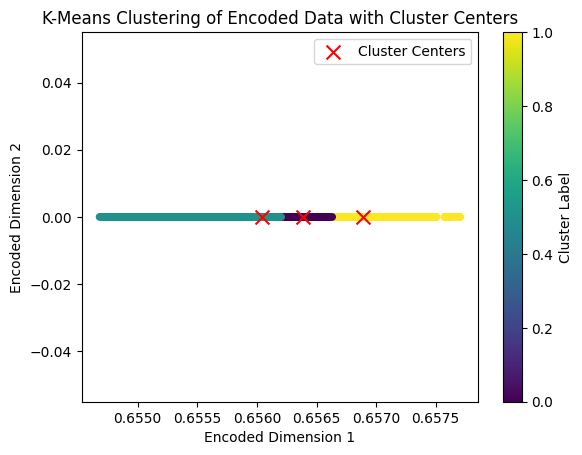

In [50]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot the scatter plot with cluster centers
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=cluster_labels, cmap='viridis', s=20)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.title('K-Means Clustering of Encoded Data with Cluster Centers')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=1, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

Text(0.5, 1.0, 'Elbow Method for Optimal K')

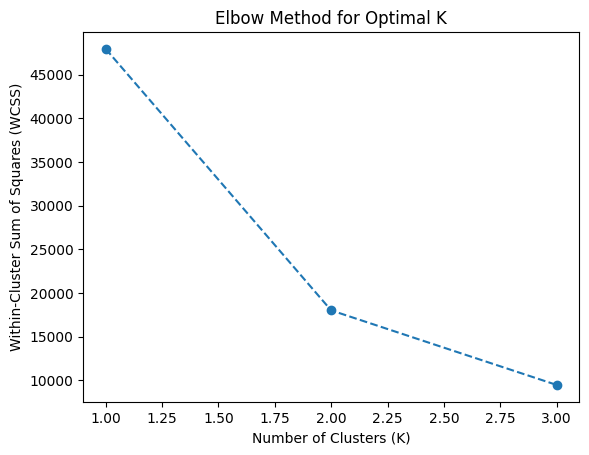

In [55]:
wcss = []
for k in range(1, 4):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 4), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()